Primero importamos las librerias a utilizar

In [27]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from pandasgui import show

Observamos cuales son las cabeceras a utilizar

In [28]:
df = pd.read_csv('youtoxic_english_1000.csv')

In [29]:
df.head(20)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


Verificamos la cantidad y la calidad de los datos que detectamos dentro del dataframe

In [30]:
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

# Call the summary function and pass the DataFrame df as an argument
resumen_datos = summary(df)

# Print the data summary
print(resumen_datos)

Dataset has 15 features and 1000 rows.
                 Unique  Missing  Missing %  Duplicated   Types
CommentId          1000        0        0.0           0  object
VideoId              13        0        0.0           0  object
Text                997        0        0.0           0  object
IsToxic               2        0        0.0           0    bool
IsAbusive             2        0        0.0           0    bool
IsThreat              2        0        0.0           0    bool
IsProvocative         2        0        0.0           0    bool
IsObscene             2        0        0.0           0    bool
IsHatespeech          2        0        0.0           0    bool
IsRacist              2        0        0.0           0    bool
IsNationalist         2        0        0.0           0    bool
IsSexist              2        0        0.0           0    bool
IsHomophobic          1        0        0.0           0    bool
IsReligiousHate       2        0        0.0           0    bool
I

In [31]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [32]:
# Crear un nuevo DataFrame con filas únicas basadas en 'VideoId'
df_unicos = df.drop_duplicates(subset='VideoId')

# Utiliza to_markdown() para mostrar el DataFrame en un formato de tabla
tabla_markdown = df_unicos.to_markdown()

# Imprime la tabla en formato Markdown
print(tabla_markdown)


|     | CommentId            | VideoId     | Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

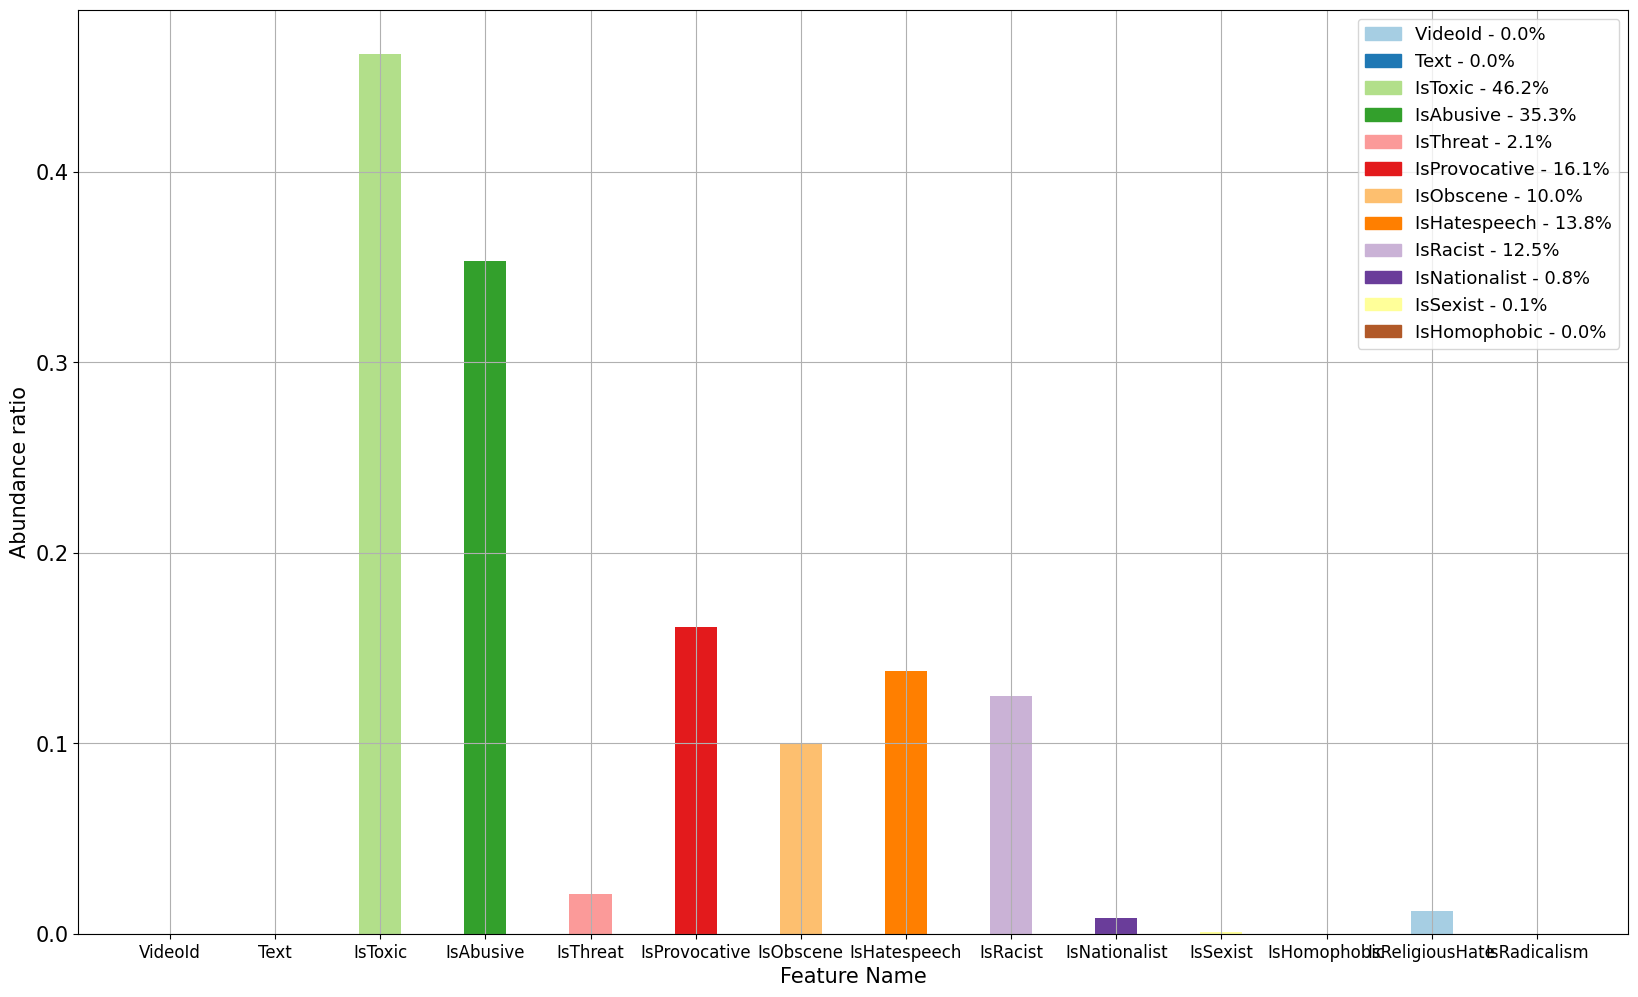

In [33]:
columns_names = df.columns.tolist()
bar_data = {}
for name in columns_names[1:]:
    bar_data[name] = len(df.loc[df[name] == 1]) / len(df[name])
    
    
bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (20, 12))
colors = plt.cm.Paired(np.arange(12))

plt.bar(bar_name, values, color = colors,
        width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Feature Name", fontsize=15)
plt.ylabel("Abundance ratio", fontsize=15)
#plt.title("Percentage of each feature from all comments", fontsize=30)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100}%") 
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()

In [34]:
columns_names = df.columns.tolist()
bar_data = {}

for name in columns_names[1:]:
    bar_data[name] = len(df.loc[df[name] == 1]) / len(df[name])

bar_df = pd.DataFrame(list(bar_data.items()), columns=['Porcentaje de participación', 'Clasificación de Hate'])

fig = px.bar(bar_df, x='Porcentaje de participación', y='Clasificación de Hate', 
             title='Porcentaje de participación por característica',
             labels={'Porcentaje de participación': 'Porcentaje de participación', 'Clasificación de Hate': 'Clasificación de Hate'},
             width=800, height=500)

fig.update_layout(xaxis=dict(tickfont=dict(size=12)), 
                  yaxis=dict(tickfont=dict(size=15)),
                  xaxis_title='Clasificación de Hate', 
                  yaxis_title='Porcentaje de participación',
                  showlegend=False)

fig.show()

In [35]:
toxic_counts = df['IsToxic'].value_counts()

data = {'IsToxic': toxic_counts.index, 'Conteo': toxic_counts.values}
toxic_counts_df = pd.DataFrame(data)

fig = px.bar(toxic_counts_df, x='IsToxic', y='Conteo',
             title='Participación de "IsToxic"',
             labels={'IsToxic': 'IsToxic', 'Conteo': 'Conteo'},
             width=600, height=400)

fig.update_layout(xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(tickfont=dict(size=15)),
                  xaxis_title='IsToxic', yaxis_title='Conteo',
                  showlegend=False)

fig.show()


In [36]:
toxic_rows = df[df['IsToxic'] == True]
column_counts = toxic_rows.drop(columns=['IsToxic']).sum()
data = {'Columna': column_counts.index, 'Conteo': column_counts.values}
column_counts_df = pd.DataFrame(data)

fig = px.bar(column_counts_df, x='Columna', y='Conteo',
             title='Contribución de cada columna en "IsToxic"',
             labels={'Columna': 'Columna', 'Conteo': 'Conteo'},
             width=800, height=500)

fig.update_layout(xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(tickfont=dict(size=15)),
                  xaxis_title='Columna', yaxis_title='Conteo',
                  showlegend=False)

fig.show()

In [37]:
hate_columns = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
                'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
                'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

df['HatePercentage'] = df[hate_columns].sum(axis=1) / len(hate_columns) * 100

print(df[['IsToxic'] + hate_columns + ['HatePercentage']])

     IsToxic  IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  \
0      False      False     False          False      False         False   
1       True       True     False          False      False         False   
2       True       True     False          False       True         False   
3      False      False     False          False      False         False   
4      False      False     False          False      False         False   
..       ...        ...       ...            ...        ...           ...   
995    False      False     False          False      False         False   
996     True      False     False          False      False          True   
997    False      False     False          False      False         False   
998    False      False     False          False      False         False   
999    False      False     False          False      False         False   

     IsRacist  IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  \
0 

In [38]:
df.head(21)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,HatePercentage
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,0.000000
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,9.090909
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False,18.181818
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,0.000000
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,0.000000
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False,18.181818
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False,18.181818
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False,36.363636
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False,0.000000
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False,18.181818


In [39]:
# show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19652\1525291607.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19652\1525291607.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19652\1525291607.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Administrator